**10.Data Visualization and Storytelling**
*   **Create meaningful visualizations using data visualization tools.**
*   **Combine multiple visualizations to tell a compelling data story.**
* **Present the findings and insights in a clear and concise manner.**



**PRACTICAL NO 10**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from wordcloud import WordCloud

# Load data
df = pd.read_csv('spotify_data clean.csv')
sns.set(style="whitegrid")
print("Head of the Dataset :")
print(df.head())
print("Shape of the Dataset: ",df.shape)

# --- Data Preparation ---
# Convert 'album_release_date' to datetime and extract the year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['release_year'] = df['album_release_date'].dt.year

# Filter data to ensure clean plotting
df_filtered = df[(df['release_year'] <= 2025) & (df['release_year'].notna())].copy()

Head of the Dataset :
                 track_id                                       track_name  \
0  3EJS5LyekDim1Tf5rBFmZl                    Trippy Mane (ft. Project Pat)   
1  1oQW6G2ZiwMuHqlPpP27DB                                             OMG!   
2  7mdkjzoIYlf1rx9EtBpGmU                                      Hard 2 Find   
3  67rW0Zl7oB3qEpD5YWWE5w  Still Get Like That (ft. Project Pat & Starrah)   
4  15xptTfRBrjsppW0INUZjf                            ride me like a harley   

   track_number  track_popularity  explicit artist_name  artist_popularity  \
0             4                 0      True       Diplo                 77   
1             1                 0      True    Yelawolf                 64   
2             1                 4      True   Riff Raff                 48   
3             8                30      True       Diplo                 77   
4             2                 0      True     Rumelis                 48   

   artist_followers                     

**1. Line Plot**

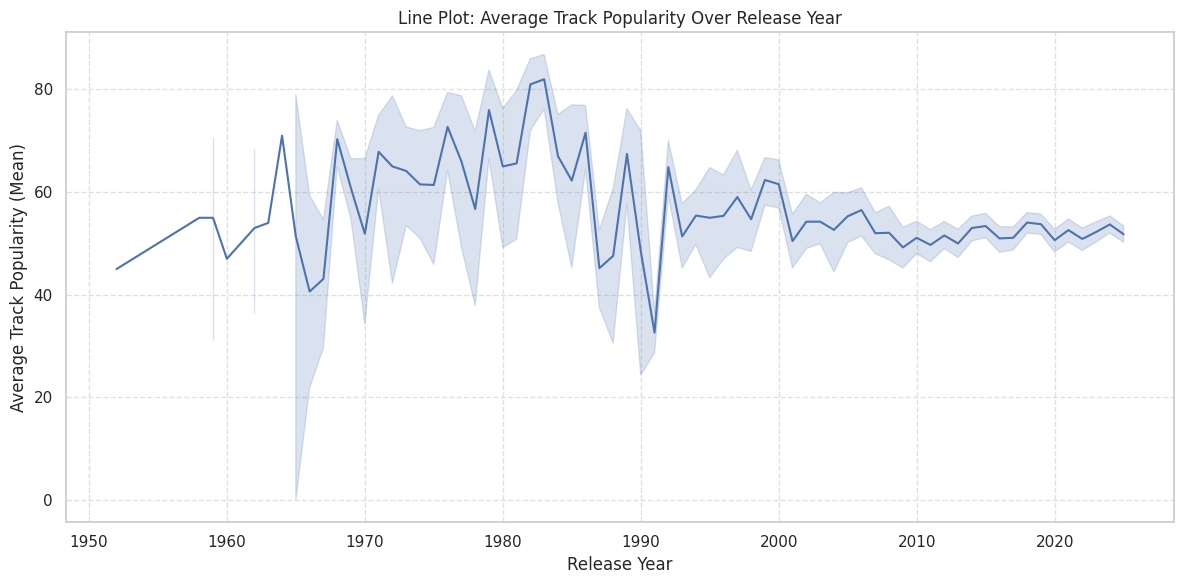

In [32]:
# --- Plot Generation ---
plt.figure(figsize=(12, 6))

# Use 'release_year' for x and 'track_popularity' for y
sns.lineplot(
    data=df_filtered,
    x='release_year',
    y='track_popularity',
    estimator='mean' # Calculates the average popularity for each year
)

plt.title('Line Plot: Average Track Popularity Over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Track Popularity (Mean)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

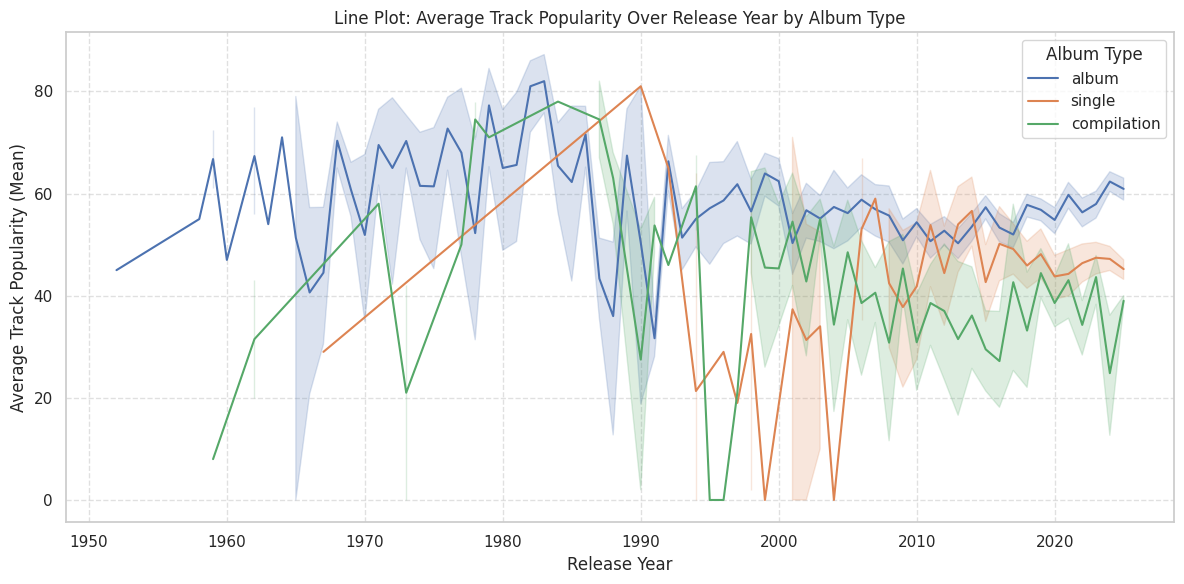

In [33]:
# --- Plot Generation ---
plt.figure(figsize=(12, 6))

# Subtype: Multi-line by Album Type
sns.lineplot(
    data=df_filtered,
    x='release_year',
    y='track_popularity',
    hue='album_type', # Separates lines by Album Type
    estimator='mean'
)

plt.title('Line Plot: Average Track Popularity Over Release Year by Album Type')
plt.xlabel('Release Year')
plt.ylabel('Average Track Popularity (Mean)')
plt.legend(title='Album Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**2. Bar Plot**

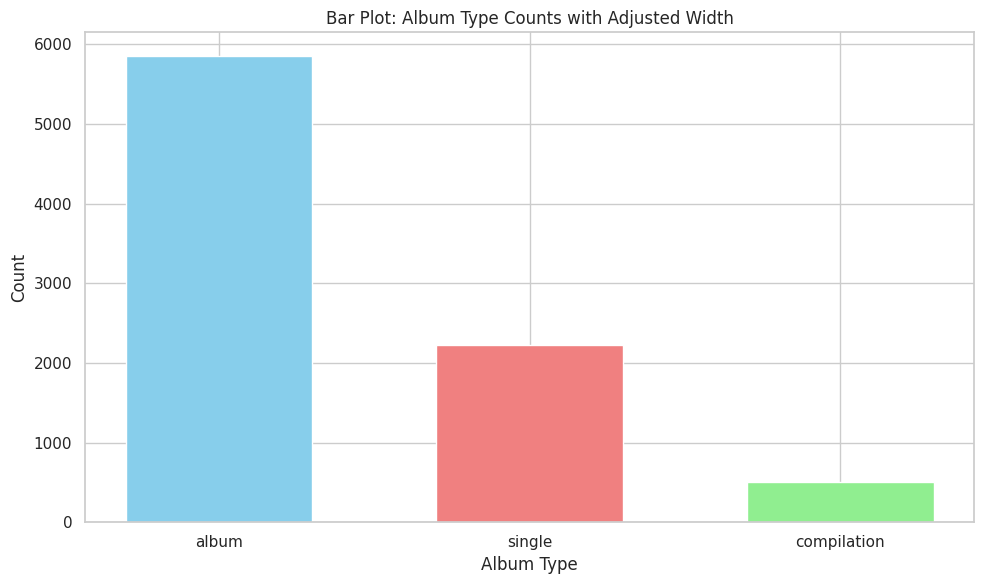

In [34]:
# --- Data Preparation ---
# Calculate the counts for 'album_type'
album_type_counts = df['album_type'].value_counts()

# Define colors for the top categories
colors = ['skyblue', 'lightcoral', 'lightgreen']

# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use plt.bar to plot the counts with custom width and colors
plt.bar(
    album_type_counts.index,
    album_type_counts.values,
    width=0.6, # Custom bar width
    color=colors[:len(album_type_counts)] # Assigns colors to the bars
)

plt.title('Bar Plot: Album Type Counts with Adjusted Width')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

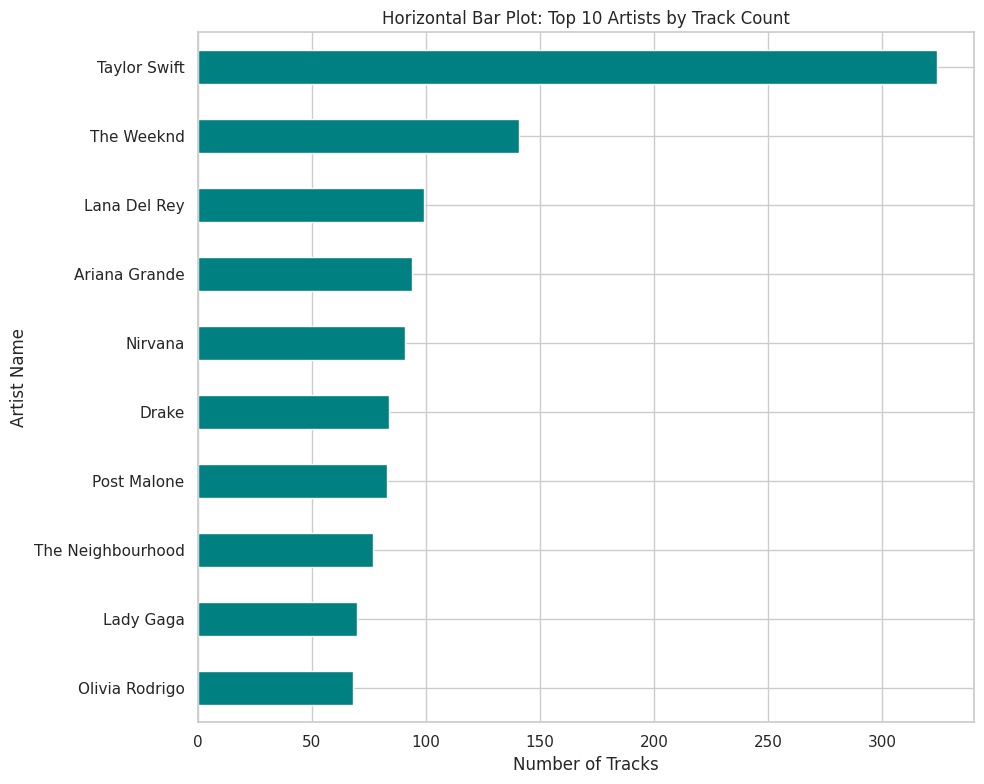

In [35]:
# --- Data Preparation ---
# Calculate the counts for 'artist_name' and select the top 10
artist_counts = df['artist_name'].value_counts().head(10)

# --- Plot Generation ---
plt.figure(figsize=(10, 8)) # Adjusted height for 10 bars

# The index (Artist Name) becomes the y-axis, and values (Count) become the x-axis
artist_counts.plot.barh(color='teal')

plt.title('Horizontal Bar Plot: Top 10 Artists by Track Count')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.gca().invert_yaxis() # Puts the highest count at the top of the chart
plt.tight_layout()
plt.show()

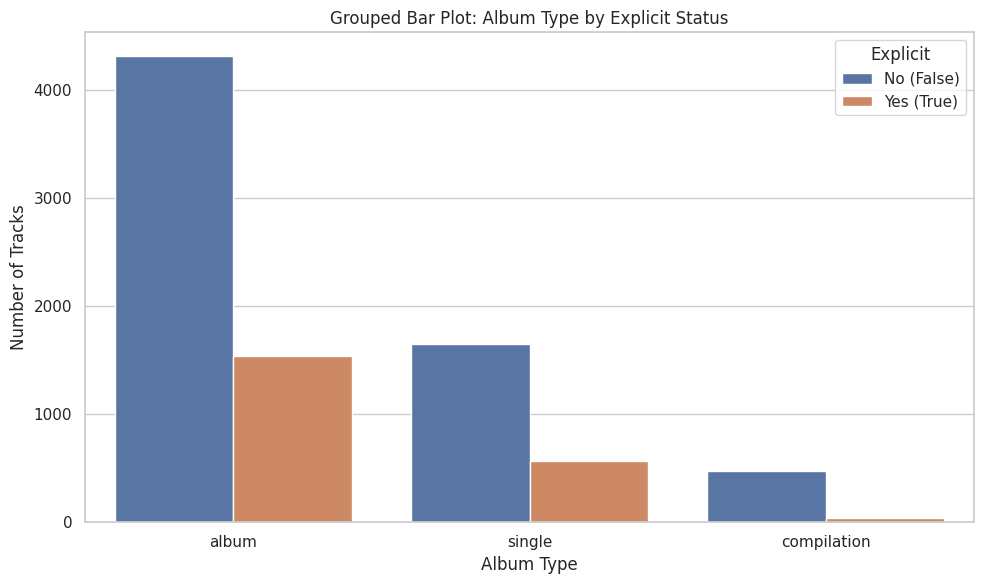

In [36]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Plot count of tracks by 'album_type' (x-axis), grouped by 'explicit' status (hue)
sns.countplot(
    data=df,
    x='album_type',
    hue='explicit',
    # Ensure the primary x-axis bars are sorted by total count
    order=df['album_type'].value_counts().index
)

plt.title('Grouped Bar Plot: Album Type by Explicit Status')
plt.xlabel('Album Type')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=0)
plt.legend(title='Explicit', labels=['No (False)', 'Yes (True)'])
plt.tight_layout()
plt.show()

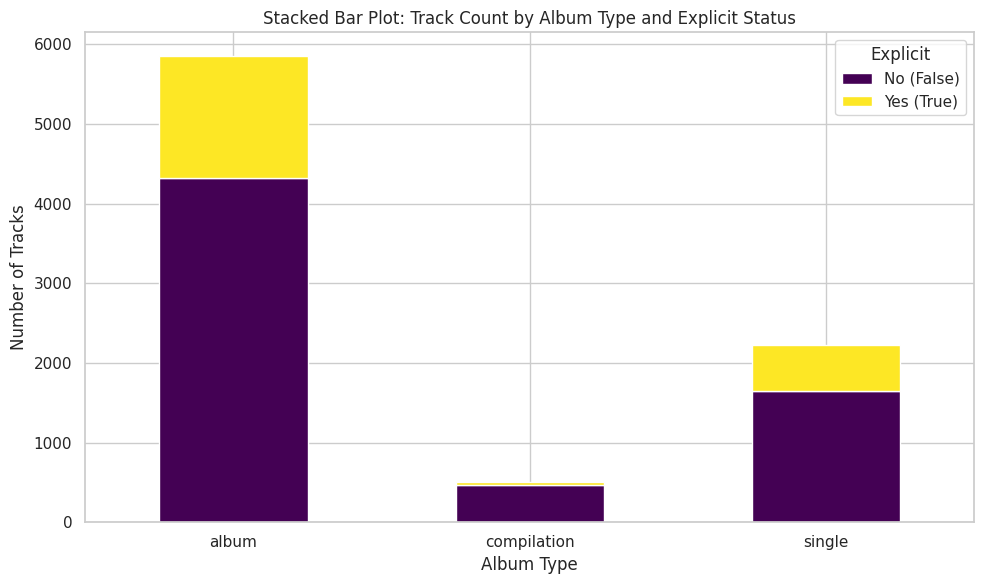

In [37]:
# --- Data Preparation for Stacked Plot ---
# Group by 'album_type' (X-axis) and 'explicit' (Stacking), count the size, and unstack
album_explicit_counts = df.groupby(['album_type', 'explicit']).size().unstack(fill_value=0)

# Sort the columns (Explicit status) for better control over legend labels
album_explicit_counts = album_explicit_counts.sort_index(axis=1)

# --- Plot Generation ---
# Use pandas plot function for stacked bar
album_explicit_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Stacked Bar Plot: Track Count by Album Type and Explicit Status')
plt.xlabel('Album Type')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=0)
# Update the legend labels
plt.legend(title='Explicit', labels=['No (False)', 'Yes (True)'])
plt.tight_layout()
plt.show()

**3. Histogram and Density Plots**

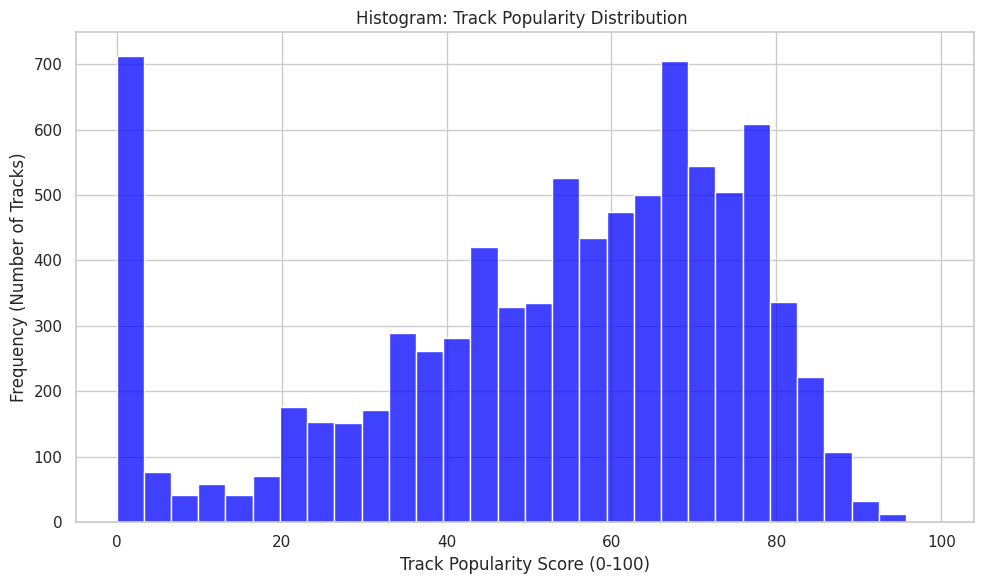

In [38]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use 'track_popularity' for the histogram. kde=False (or omitting kde) ensures no density line.
sns.histplot(df['track_popularity'], bins=30, kde=False, color='blue')

plt.title('Histogram: Track Popularity Distribution ')
plt.xlabel('Track Popularity Score (0-100)')
plt.ylabel('Frequency (Number of Tracks)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-539737947.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Album Type')


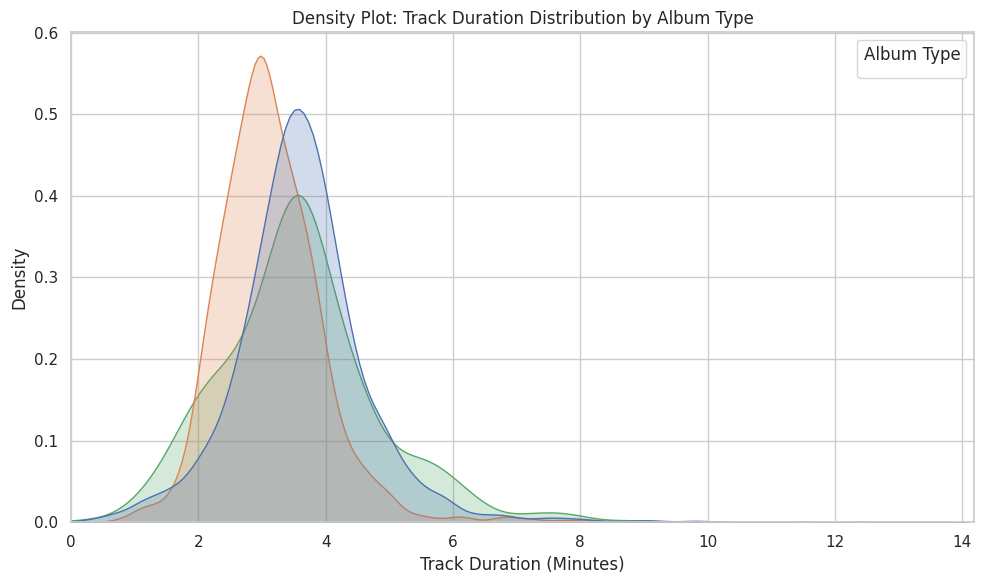

In [39]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Plot track duration distribution for different album types using the 'hue' parameter
sns.kdeplot(
    data=df,
    x='track_duration_min',
    hue='album_type',  # This splits the data and creates multiple curves
    fill=True,
    common_norm=False # Ensures the area under each curve sums to 1 (better for comparison)
)

plt.title('Density Plot: Track Duration Distribution by Album Type')
plt.xlabel('Track Duration (Minutes)')
plt.ylabel('Density')
plt.xlim(0, df['track_duration_min'].max() * 1.05)
plt.legend(title='Album Type')
plt.tight_layout()
plt.show()

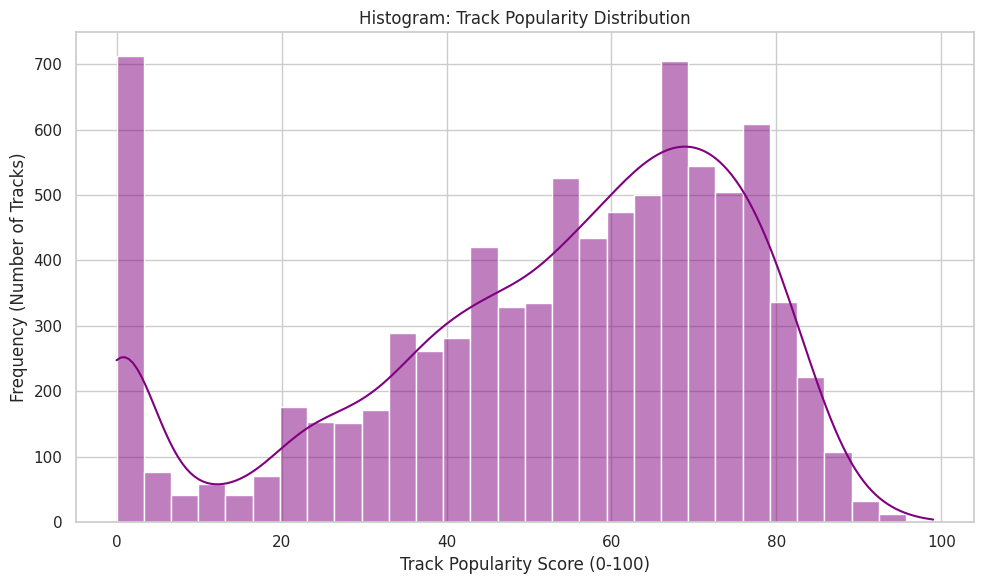

In [40]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use 'track_popularity' for the histogram. 'kde=True' adds a smooth density line.
sns.histplot(df['track_popularity'], bins=30, kde=True, color='purple')

plt.title('Histogram: Track Popularity Distribution')
plt.xlabel('Track Popularity Score (0-100)')
plt.ylabel('Frequency (Number of Tracks)')
plt.tight_layout()
plt.show()

## **4. Scatter Plot**

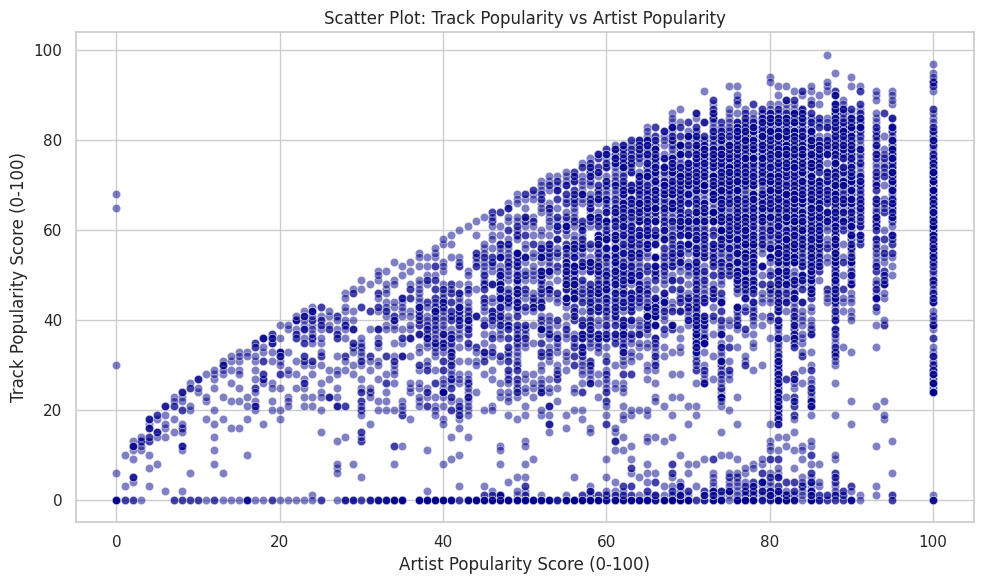

In [41]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use 'artist_popularity' for X and 'track_popularity' for Y
sns.scatterplot(
    data=df,
    x='artist_popularity',
    y='track_popularity',
    alpha=0.5, # Helps with overplotting by making points translucent
    color='darkblue'
)

plt.title('Scatter Plot: Track Popularity vs Artist Popularity')
plt.xlabel('Artist Popularity Score (0-100)')
plt.ylabel('Track Popularity Score (0-100)')
plt.tight_layout()
plt.show()

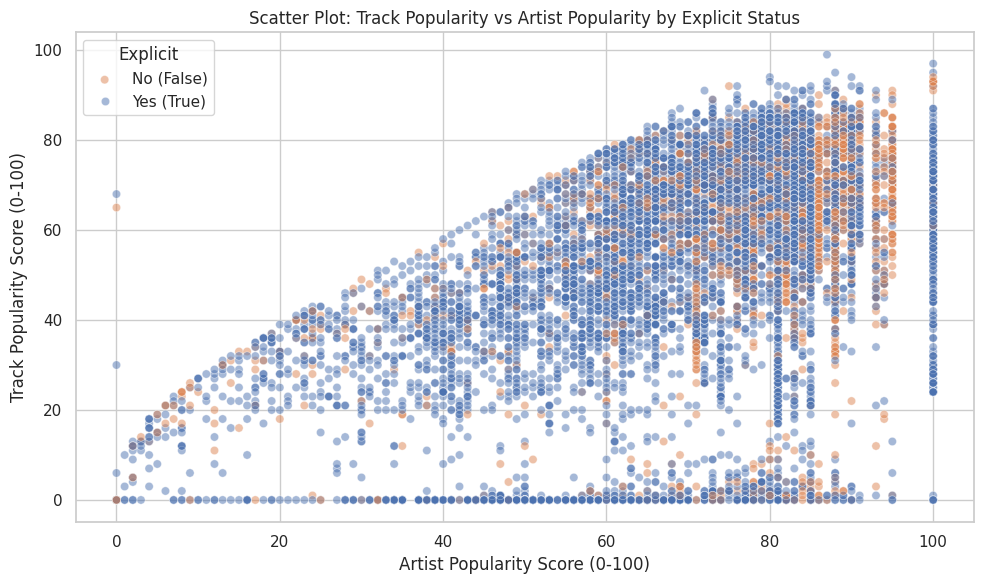

In [42]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use 'artist_popularity' for X, 'track_popularity' for Y, and 'explicit' for hue
sns.scatterplot(
    data=df,
    x='artist_popularity',
    y='track_popularity',
    hue='explicit', # Color points based on 'explicit' status
    alpha=0.5
)

plt.title('Scatter Plot: Track Popularity vs Artist Popularity by Explicit Status')
plt.xlabel('Artist Popularity Score (0-100)')
plt.ylabel('Track Popularity Score (0-100)')
plt.legend(title='Explicit', labels=['No (False)', 'Yes (True)'])
plt.tight_layout()
plt.show()

**5. Heatmap**

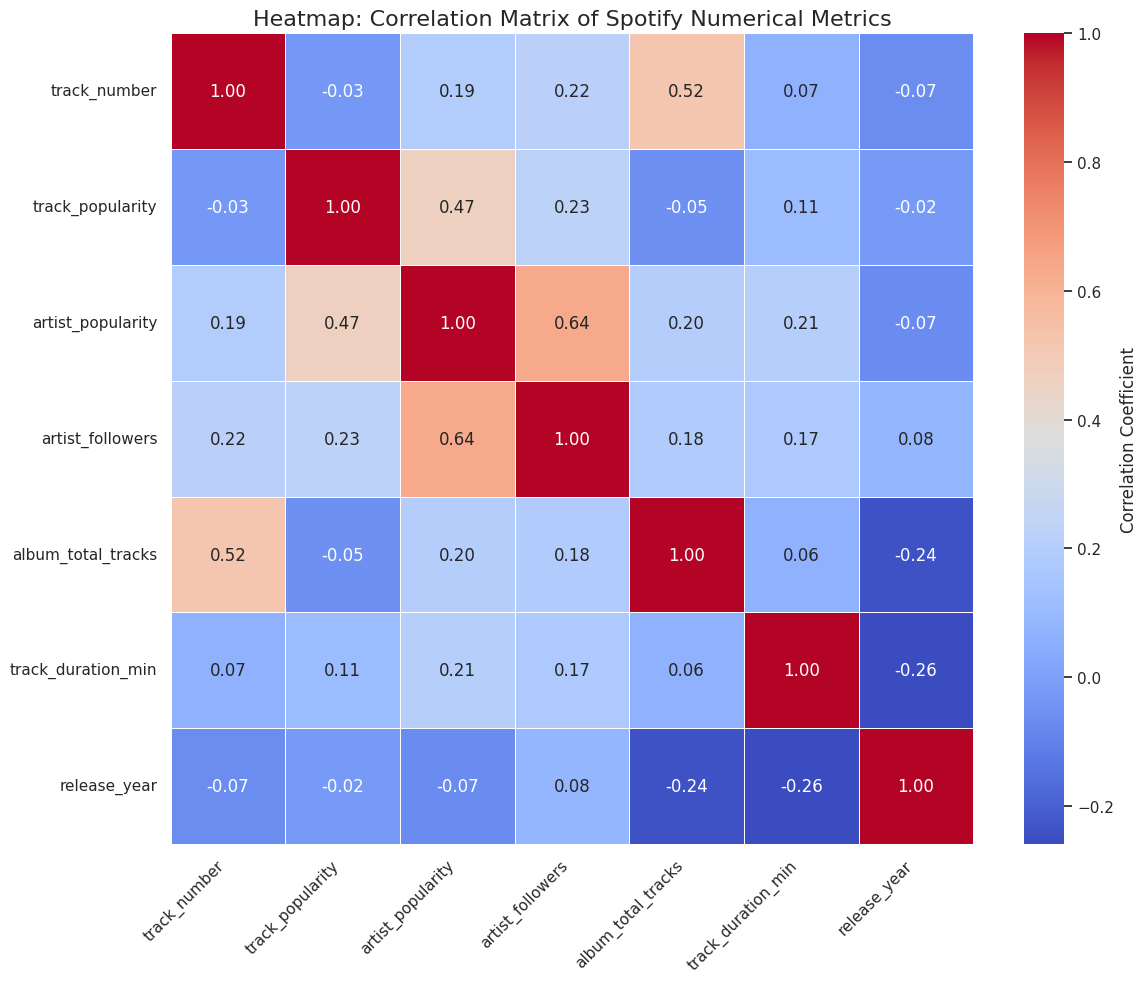

In [43]:
# --- Data Preparation for Correlation ---
# Extract release year to include time trends in correlation
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['release_year'] = df['album_release_date'].dt.year

# Filter data and select only numerical columns
df_filtered = df[(df['release_year'] <= 2025) & (df['release_year'].notna())].copy()
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns
corr = df_filtered[numeric_cols].corr()

# --- Plot Generation ---
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,     # Show correlation values
    fmt=".2f",      # Format to 2 decimal places
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Heatmap: Correlation Matrix of Spotify Numerical Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**6. Pie Chart**

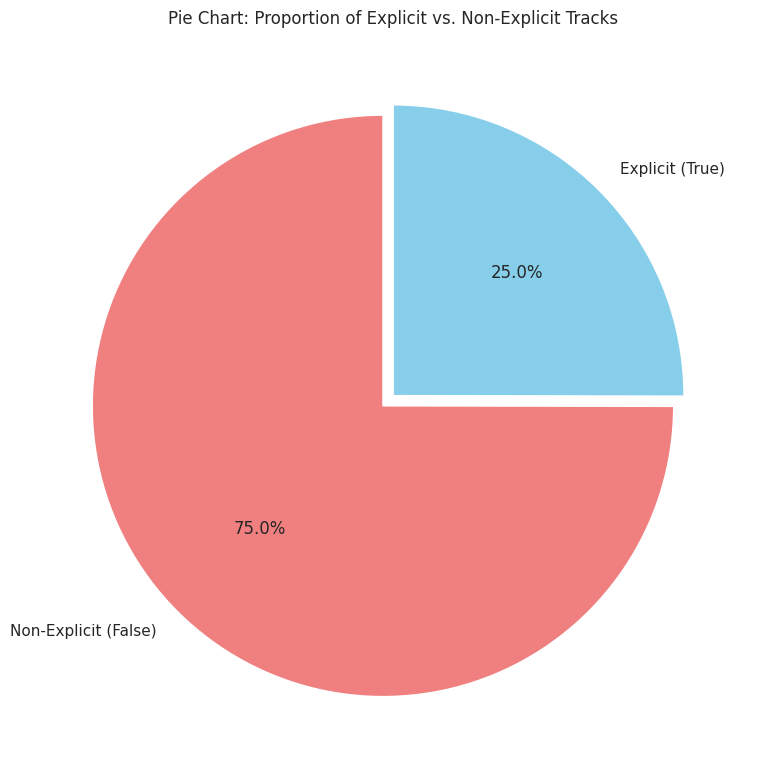

In [44]:
# --- Data Preparation ---
# Calculate the counts for 'explicit'
explicit_counts = df['explicit'].value_counts()

# Replace boolean index with clearer labels for the plot
explicit_counts.index = ['Non-Explicit (False)', 'Explicit (True)']

# --- Plot Generation ---
plt.figure(figsize=(8, 8))

# Use pandas plot function for pie chart
explicit_counts.plot.pie(
    autopct='%1.1f%%', # Format percentage labels
    startangle=90,     # Start the first slice at the top
    colors=['lightcoral', 'skyblue'],
    explode=[0.05, 0] # Highlight the larger 'Non-Explicit' segment
)

plt.title('Pie Chart: Proportion of Explicit vs. Non-Explicit Tracks')
plt.ylabel('') # Remove default y-label
plt.tight_layout()
plt.show()

**7. Donut Plot**

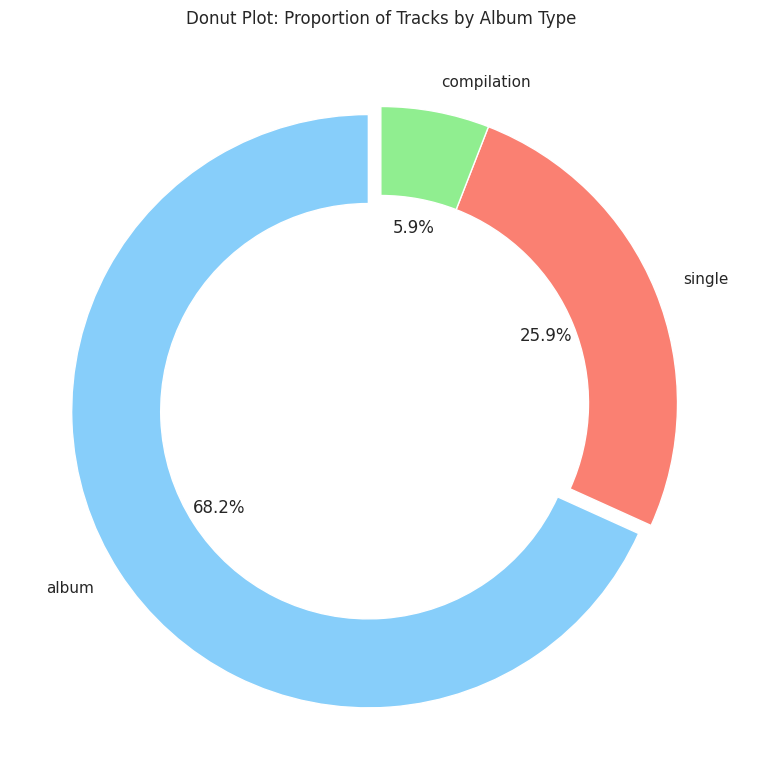

In [45]:
# --- Data Preparation ---
# Calculate the counts for 'album_type'
album_type_counts = df['album_type'].value_counts()

# --- Plot Generation ---
plt.figure(figsize=(8, 8))

# Define colors
colors = ['lightskyblue', 'salmon', 'lightgreen']
# Define explode based on the sorted index (Album is the largest)
explode = [0.05 if i == album_type_counts.index[0] else 0 for i in album_type_counts.index]

# Create the donut plot using plt.pie with wedgeprops to create the hole
plt.pie(
    album_type_counts,
    labels=album_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w'), # Creates the donut hole (width=0.3)
    colors=colors,
    explode=explode
)

plt.title('Donut Plot: Proportion of Tracks by Album Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

**8. Box Plot**

/tmp/ipython-input-3823817129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


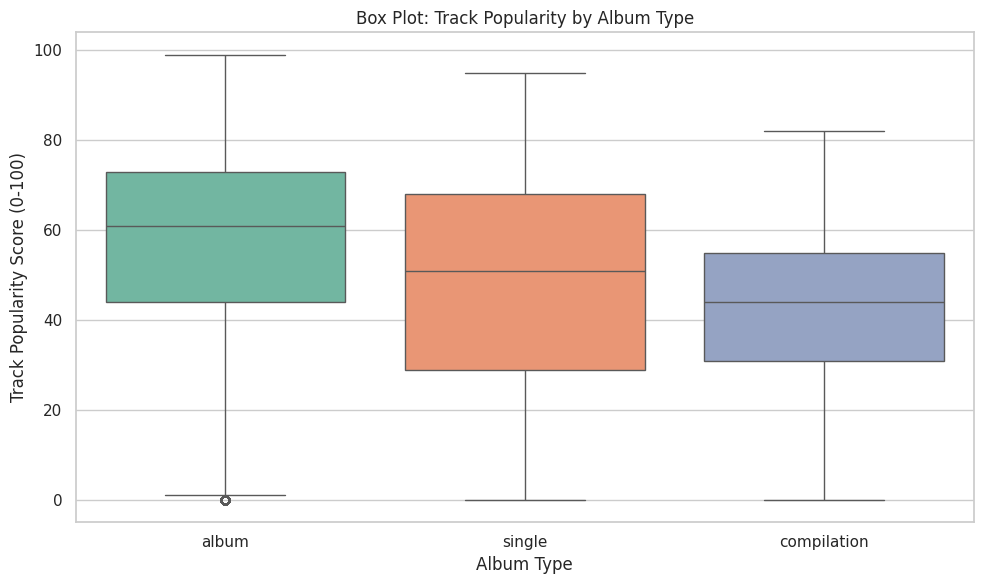

In [46]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use 'album_type' for the X-axis (grouping) and 'track_popularity' for the Y-axis (distribution)
sns.boxplot(
    data=df,
    x='album_type',
    y='track_popularity',
    palette='Set2',
    order=df['album_type'].value_counts().index # Sort by category size
)

plt.title('Box Plot: Track Popularity by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Track Popularity Score (0-100)')
plt.tight_layout()
plt.show()

**9. Time Series Graph**

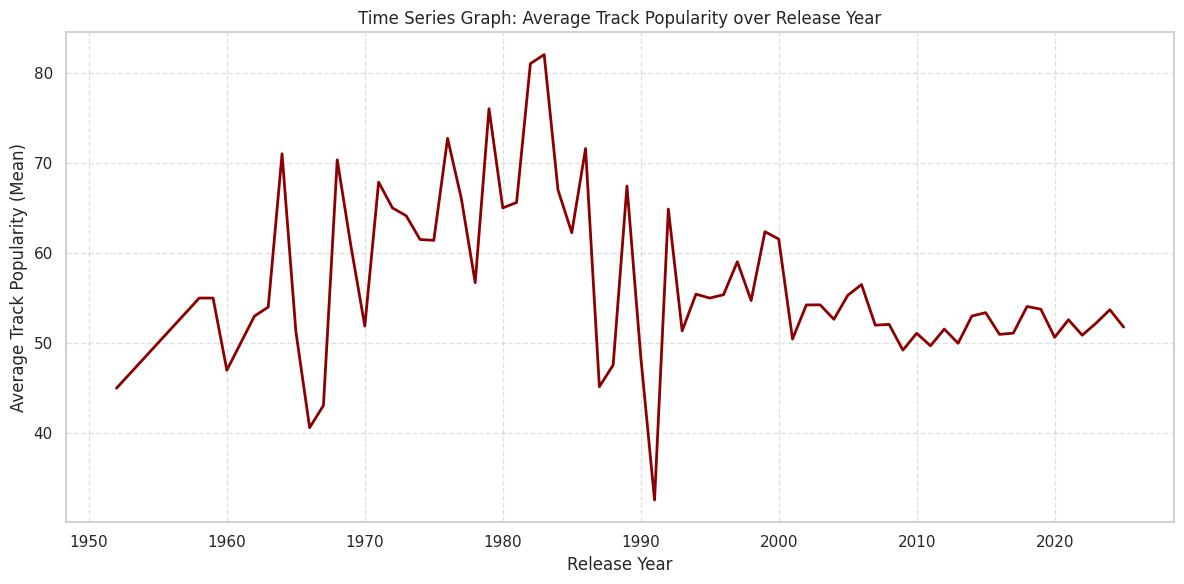

In [47]:
# --- Data Preparation for Time Series ---
# Convert 'album_release_date' to datetime and extract the year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['release_year'] = df['album_release_date'].dt.year

# Filter data and aggregate: Group by year and calculate the MEAN track popularity
df_filtered = df[(df['release_year'] <= 2025) & (df['release_year'].notna())].copy()
ts_data = df_filtered.groupby('release_year')['track_popularity'].mean()

# --- Plot Generation ---
plt.figure(figsize=(12, 6))

# Use pandas plot function on the aggregated time series data
ts_data.plot(color='darkred', linewidth=2)

plt.title('Time Series Graph: Average Track Popularity over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Track Popularity (Mean)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**10. Violin Plot**

/tmp/ipython-input-2840236892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


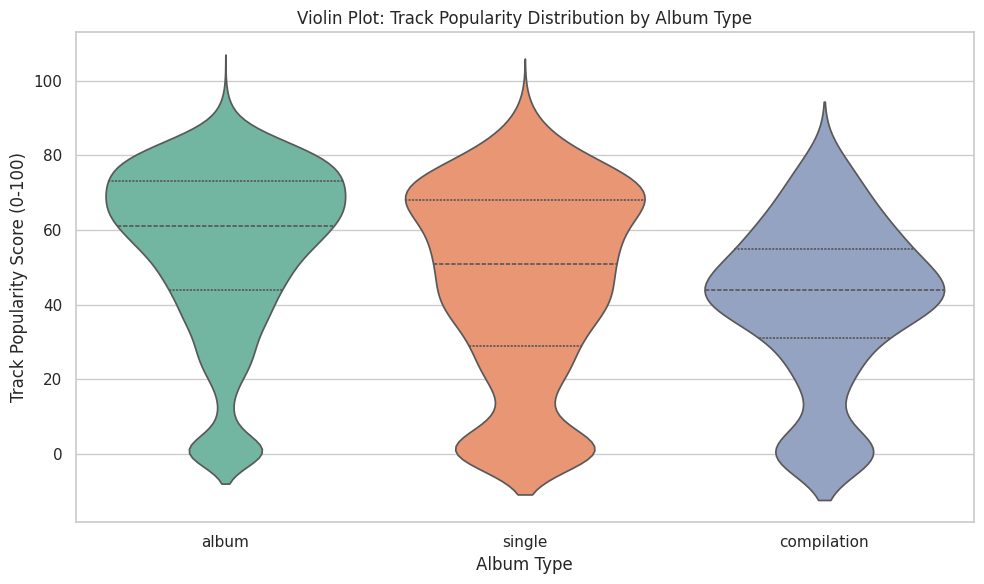

In [48]:
# --- Plot Generation ---
plt.figure(figsize=(10, 6))

# Use 'album_type' for the X-axis and 'track_popularity' for the Y-axis
sns.violinplot(
    data=df,
    x='album_type',
    y='track_popularity',
    palette='Set2',
    inner='quartile', # Displays the quartiles (like a box plot) inside the violin
    order=df['album_type'].value_counts().index
)

plt.title('Violin Plot: Track Popularity Distribution by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Track Popularity Score (0-100)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**11. Pair Plots**

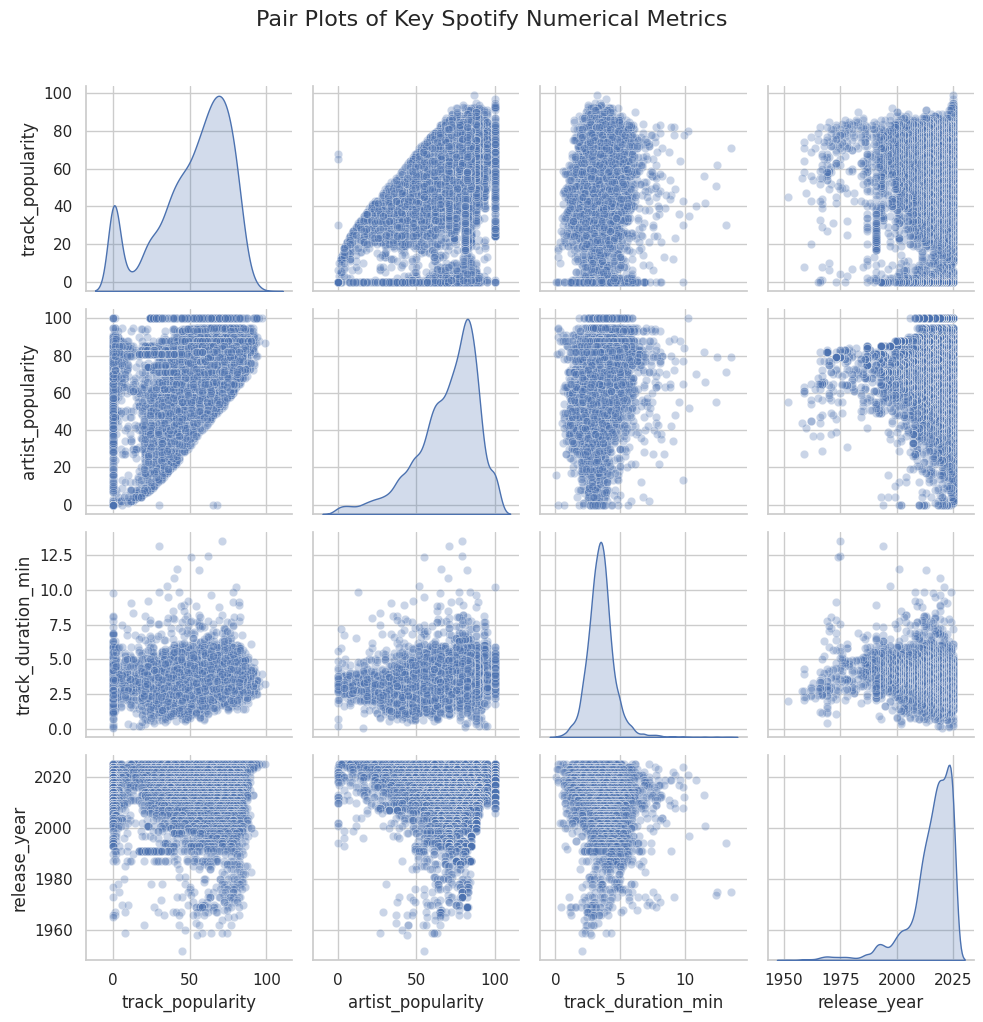

In [49]:
# --- Data Preparation ---
# Extract release year to include in the pair plot
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['release_year'] = df['album_release_date'].dt.year
df_filtered = df[(df['release_year'] <= 2025) & (df['release_year'].notna())].copy()

# Select relevant numerical columns for pairplot
pairplot_cols = [
    'track_popularity',
    'artist_popularity',
    'track_duration_min',
    'release_year'
]

# --- Plot Generation ---
# Create the pairplot
g = sns.pairplot(
    df_filtered[pairplot_cols],
    height=2.5,          # Controls the size of each subplot
    plot_kws={'alpha': 0.3}, # Set alpha for scatter plots
    diag_kind='kde'      # Use KDE (smooth density) for diagonal distributions
)

g.fig.suptitle('Pair Plots of Key Spotify Numerical Metrics', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()